<a href="https://colab.research.google.com/github/njorogewacira001/.py/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

Cryptocurrency price prediction is a challenging task due to the volatile nature and complexity of the cryptocurrency market. However, accurate predictions can help traders and investors make informed decisions. Long Short-Term Memory (LSTM) models, a type of Recurrent Neural Network (RNN), have proven effective in time series forecasting, making them suitable for predicting cryptocurrency prices.

 **Importance of Cryptocurrency Price Prediction:**

Predicting cryptocurrency prices accurately can have significant implications for traders, investors, and other stakeholders in the market. It enables them to make informed investment decisions, manage risks, and potentially capitalize on market opportunities. Furthermore, understanding the factors influencing cryptocurrency prices can provide valuable insights into market trends and dynamics.

**Objectives of the Notebook:**

This notebook aims to analyze historical cryptocurrency data, identify patterns and trends, and develop an LSTM model to predict future cryptocurrency prices. Specifically, we will:

1. Explore and visualize historical cryptocurrency data.
2. Preprocess the data for LSTM model input.
3. Build an LSTM model for price prediction.
4. Train and evaluate the model's performance.
5. Analyze the model's predictions and compare them with actual values.
6. Identify potential limitations and suggest improvements for future research.

**Below is Breakdown of our task**

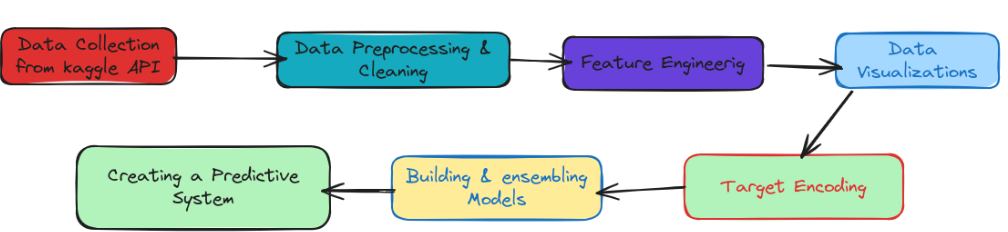

In [68]:
#instllation of Libraries
!pip install kaggle
!pip install category_encoders

# **Data Collection from Kaggle API**



In [2]:
#Upload kaggle json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gavinnjoroge","key":"2f18ff2a48d5df12589ada8adc591655"}'}

In [3]:
!ls /content


'kaggle (1).json'   kaggle.json   sample_data


In [4]:
from google.colab import userdata
userdata.get('gavinnjoroge')

'09e0c6db2fcdb909f5b46d6d8be685'

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

In [7]:
#download the dataset using kaggle API
!kaggle datasets download -d sudalairajkumar/cryptocurrency-historical-prices-coingecko --force

  0% 0.00/2.95M [00:00<?, ?B/s]
100% 2.95M/2.95M [00:00<00:00, 138MB/s]


# Data Loading

In [11]:
from google.colab import files
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
print('imported all libraries to use in price prediction')

imported all libraries to use in price prediction


In [8]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/cryptocurrency-historical-prices-coingecko.zip'
# Path to extract the files
extract_path = '/content/cryptocurrency-historical-prices-coingecko'
# Create a directory to extract the files
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['tron.csv', 'frax.csv', 'ethereum.csv', 'algorand.csv', 'chiliz.csv', 'okb.csv', 'bitcoin-cash.csv', 'cardano.csv', 'bitcoin.csv', 'staked-ether.csv', 'polkadot.csv', 'tether.csv', 'ftx-token.csv', 'hedera-hashgraph.csv', 'chainlink.csv', 'tezos.csv', 'dai.csv', 'terra-luna.csv', 'leo-token.csv', 'monero.csv', 'eos.csv', 'binancecoin.csv', 'lido-dao.csv', 'chain-2.csv', 'matic-network.csv', 'vechain.csv', 'usd-coin.csv', 'flow.csv', 'filecoin.csv', 'ripple.csv', 'near.csv', 'binance-usd.csv', 'uniswap.csv', 'theta-token.csv', 'wrapped-bitcoin.csv', 'axie-infinity.csv', 'ethereum-classic.csv', 'decentraland.csv', 'internet-computer.csv', 'litecoin.csv', 'cosmos.csv', 'solana.csv', 'crypto-com-chain.csv', 'apecoin.csv', 'stellar.csv', 'the-sandbox.csv', 'shiba-inu.csv', 'quant-network.csv', 'dogecoin.csv', 'avalanche-2.csv']


In [38]:
# Path to the CSV file within the extracted directory
csv_file_path = '/content/cryptocurrency-historical-prices-coingecko/data.csv'

In [18]:
print(csv_files)


['/content/cryptocurrency-historical-prices-coingecko/tron.csv', '/content/cryptocurrency-historical-prices-coingecko/frax.csv', '/content/cryptocurrency-historical-prices-coingecko/ethereum.csv', '/content/cryptocurrency-historical-prices-coingecko/algorand.csv', '/content/cryptocurrency-historical-prices-coingecko/chiliz.csv', '/content/cryptocurrency-historical-prices-coingecko/okb.csv', '/content/cryptocurrency-historical-prices-coingecko/bitcoin-cash.csv', '/content/cryptocurrency-historical-prices-coingecko/cardano.csv', '/content/cryptocurrency-historical-prices-coingecko/bitcoin.csv', '/content/cryptocurrency-historical-prices-coingecko/staked-ether.csv', '/content/cryptocurrency-historical-prices-coingecko/polkadot.csv', '/content/cryptocurrency-historical-prices-coingecko/tether.csv', '/content/cryptocurrency-historical-prices-coingecko/ftx-token.csv', '/content/cryptocurrency-historical-prices-coingecko/hedera-hashgraph.csv', '/content/cryptocurrency-historical-prices-coinge

In [22]:
#load the extrated dataset
# the CSV file name
file_name = '/content/data/data.csv'


# **Data Prepocessing And Cleaning**

In [25]:
import os
import glob
import pandas as pd

# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file, index_col=0)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)

# Reset the index for a clean numbering of rows
merged_df.reset_index(drop=True, inplace=True)



In [26]:
# Print the first few rows and columns of the DataFrame

print(merged_df.columns)


Index(['price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')


In [193]:
df.head()

,date,price,total_volume,market_cap,coin_name
0,1600732800,5.284244,2.458573e+08,1.243579e+08,31.168648
1,1600819200,5.284244,2.458573e+08,1.243579e+08,31.168648
2,1600905600,3.491229,9.734243e+07,8.633525e+07,31.168648
3,1600992000,4.573891,6.966517e+07,1.122094e+08,31.168648
4,1601078400,4.702974,4.195075e+07,1.154319e+08,31.168648


In [194]:
df.tail()

,date,price,total_volume,market_cap,coin_name
1278,1711152000,53.074283,1.389533e+09,2.000047e+10,31.168648
1279,1711238400,53.558370,7.476091e+08,2.021925e+10,31.168648
1280,1711324800,55.637222,6.014348e+08,2.100957e+10,31.168648
1281,1711411200,57.628380,1.115855e+09,2.168730e+10,31.168648
1282,1711497600,55.905605,9.427673e+08,2.107724e+10,31.168648


In [195]:
print(merged_df.head())

       level_0     price  total_volume    market_cap coin_name
index                                                         
0            0  0.002387  1.224287e+06  1.564042e+08      tron
1            1  0.002044  9.904228e+05  1.339685e+08      tron
2            2  0.001915  7.076430e+05  1.254706e+08      tron
3            3  0.001804  8.147892e+05  1.182352e+08      tron
4            4  0.002018  8.949856e+05  1.323864e+08      tron


In [196]:
print(merged_df.tail())

       level_0      price  total_volume    market_cap    coin_name
index                                                             
98823    98823  53.074283  1.389533e+09  2.000047e+10  avalanche-2
98824    98824  53.558370  7.476091e+08  2.021925e+10  avalanche-2
98825    98825  55.637222  6.014348e+08  2.100957e+10  avalanche-2
98826    98826  57.628380  1.115855e+09  2.168730e+10  avalanche-2
98827    98827  55.905605  9.427673e+08  2.107724e+10  avalanche-2


In [198]:
print("Number of unique coins:", merged_df['coin_name'].nunique())


Number of unique coins: 50


In [89]:
print("Length of df_list:", len(df_list))

Length of df_list: 50


In [20]:
print("Shape of merged_df:", merged_df.shape)

Shape of merged_df: (98828, 4)


In [90]:
# check the null values
df.isnull().sum()

date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64

In [34]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float', 'int']).columns
X_train = df[num_cols]

In [91]:
# Handle missing values
X_train = X_train.fillna(0)

In [96]:
# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)



In [97]:
merged_df['coin_name'].nunique()

50

In [98]:
merged_df.nunique()

date             5529
price           97799
total_volume    98759
market_cap      95983
coin_name          50
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1283 non-null   object 
 1   price         1283 non-null   float64
 2   total_volume  1283 non-null   float64
 3   market_cap    1283 non-null   float64
 4   coin_name     1283 non-null   object 
dtypes: float64(3), object(2)
memory usage: 50.2+ KB


In [100]:
df['price'] = df['price'].astype(np.float32)
df['total_volume'] = df['total_volume'].astype(np.float32)
df['market_cap'] = df['market_cap'].astype(np.float32)


In [101]:
df['date'] = df.index  # Create a new 'date' column with the DataFrame index
df['date'] = pd.to_datetime(df['date'])  # Convert it to datetime format


In [102]:
df.drop_duplicates(inplace=True)


# Feature Engineering

In [108]:
from sklearn.preprocessing import MinMaxScaler

# Check for missing values in each column
print(merged_df.isna().sum())

# Drop rows with missing values
merged_df.dropna(inplace=True)




date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64


In [109]:
merged_df.index = pd.to_datetime(merged_df.index, errors='coerce')
merged_df['date'] = merged_df.index


In [110]:
# Scale numeric values in specific columns to a range between 0 and 1
scaler = MinMaxScaler()
numeric_cols = ['price', 'total_volume', 'market_cap']
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

In [111]:
# Set the path to the directory containing the CSV files
csv_path = '/content/cryptocurrency-historical-prices-coingecko/'
# Use glob to get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_path, '*.csv'))

# Create a list to store DataFrames from each CSV file
df_list = []

# Iterate over the list of CSV files, read each file, and append it to the df_list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)

# Concatenate all DataFrames in the df_list to create a single DataFrame
merged_df = pd.concat(df_list, axis=0, ignore_index=False)




In [112]:
# Check the number of unique values in the 'coin_name' column
print(merged_df['coin_name'].nunique())

50


In [113]:
df.isna().sum()*100/df.shape[0]

date            0.0
price           0.0
total_volume    0.0
market_cap      0.0
coin_name       0.0
dtype: float64

# Data Visualizations

In [114]:
#  Display the descriptive statistics
print(df.describe())

             price  total_volume    market_cap
count  1283.000000  1.283000e+03  1.283000e+03
mean     31.168648  5.035548e+08  7.974409e+09
std      27.510263  5.326755e+08  7.039342e+09
min       2.914066  2.393108e+06  7.701045e+07
25%      12.896124  1.301533e+08  3.524603e+09
50%      18.869815  3.190949e+08  5.127762e+09
75%      39.448551  7.033745e+08  1.259559e+10
max     134.469747  3.390566e+09  3.006635e+10


In [115]:
# Display the class label distribution
print(df['price'].value_counts())

price
5.284244      2
14.981794     1
21.119060     1
20.560932     1
21.428867     1
             ..
134.469747    1
130.169607    1
126.069631    1
111.369659    1
55.905605     1
Name: count, Length: 1282, dtype: int64


In [119]:
print(df['total_volume'].value_counts())

total_volume
2.458573e+08    2
1.504110e+08    1
4.473310e+08    1
6.665347e+08    1
7.271520e+08    1
               ..
3.060245e+09    1
3.310626e+09    1
2.148221e+09    1
1.483215e+09    1
9.427673e+08    1
Name: count, Length: 1282, dtype: int64


In [120]:
print(df['market_cap'].value_counts())

market_cap
1.243579e+08    2
4.967738e+09    1
6.631341e+09    1
6.478003e+09    1
6.777191e+09    1
               ..
3.006635e+10    1
2.875888e+10    1
2.778501e+10    1
2.422815e+10    1
2.107724e+10    1
Name: count, Length: 1282, dtype: int64


<Axes: ylabel='Frequency'>

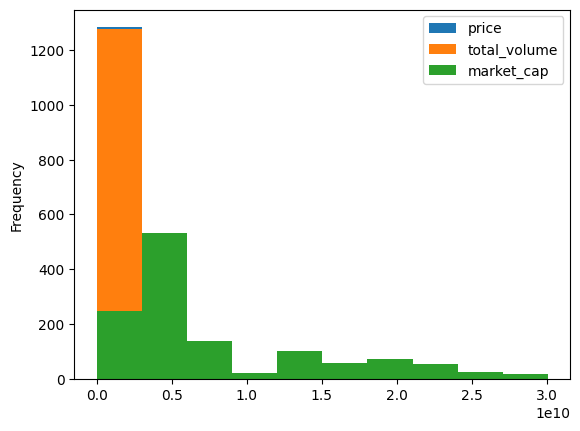

In [122]:
df.plot(kind='hist')

<Axes: >

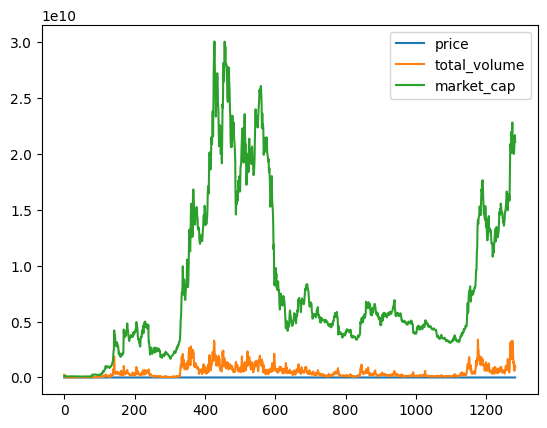

In [123]:
df.plot()

<Axes: xlabel='date'>

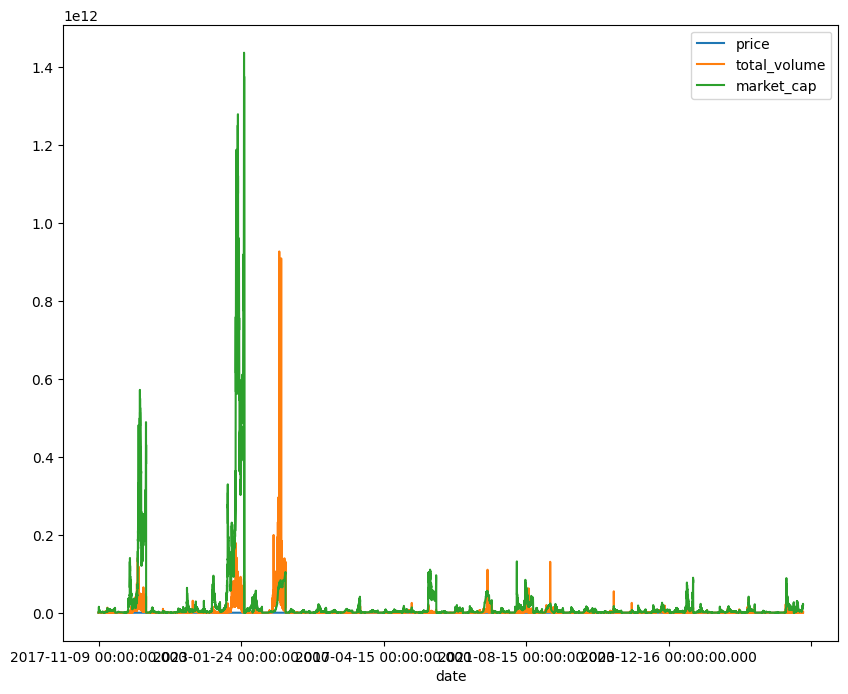

In [128]:


# Plot the entire DataFrame
merged_df.plot(kind='line', figsize=(10, 8))


<Axes: xlabel='date'>

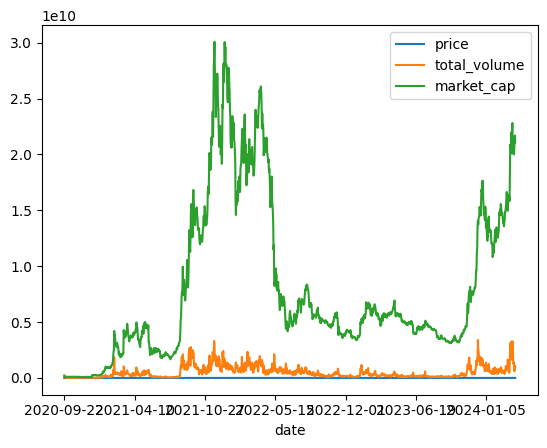

In [129]:
df.plot (kind='line', x='date', y= ['price', 'total_volume', 'market_cap'])

<Axes: xlabel='date'>

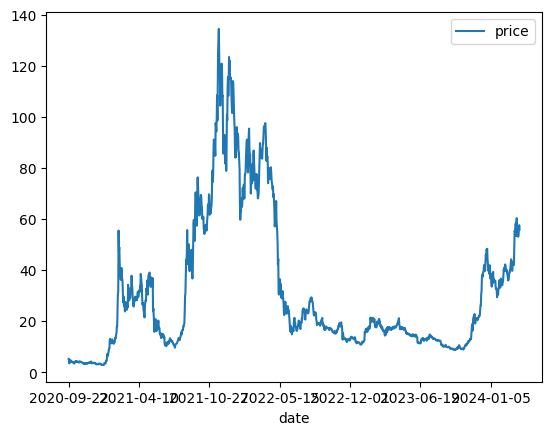

In [132]:
df.plot (kind='line', x='date', y= ['price'])

<Axes: xlabel='date'>

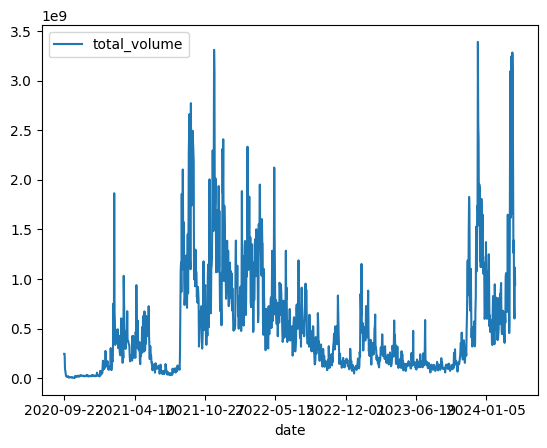

In [133]:
df.plot (kind='line', x='date', y= ['total_volume'])

<Axes: xlabel='date'>

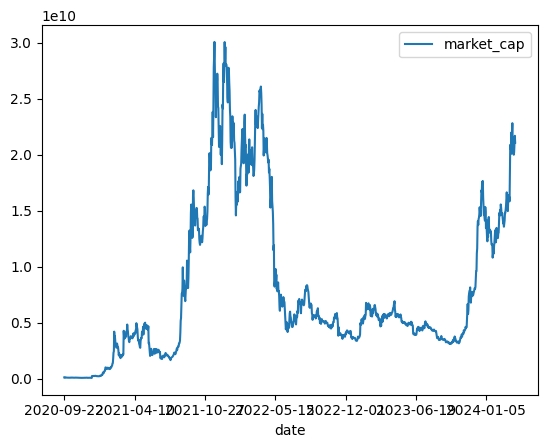

In [160]:

  df.plot (kind='line', x='date', y= ['market_cap'])


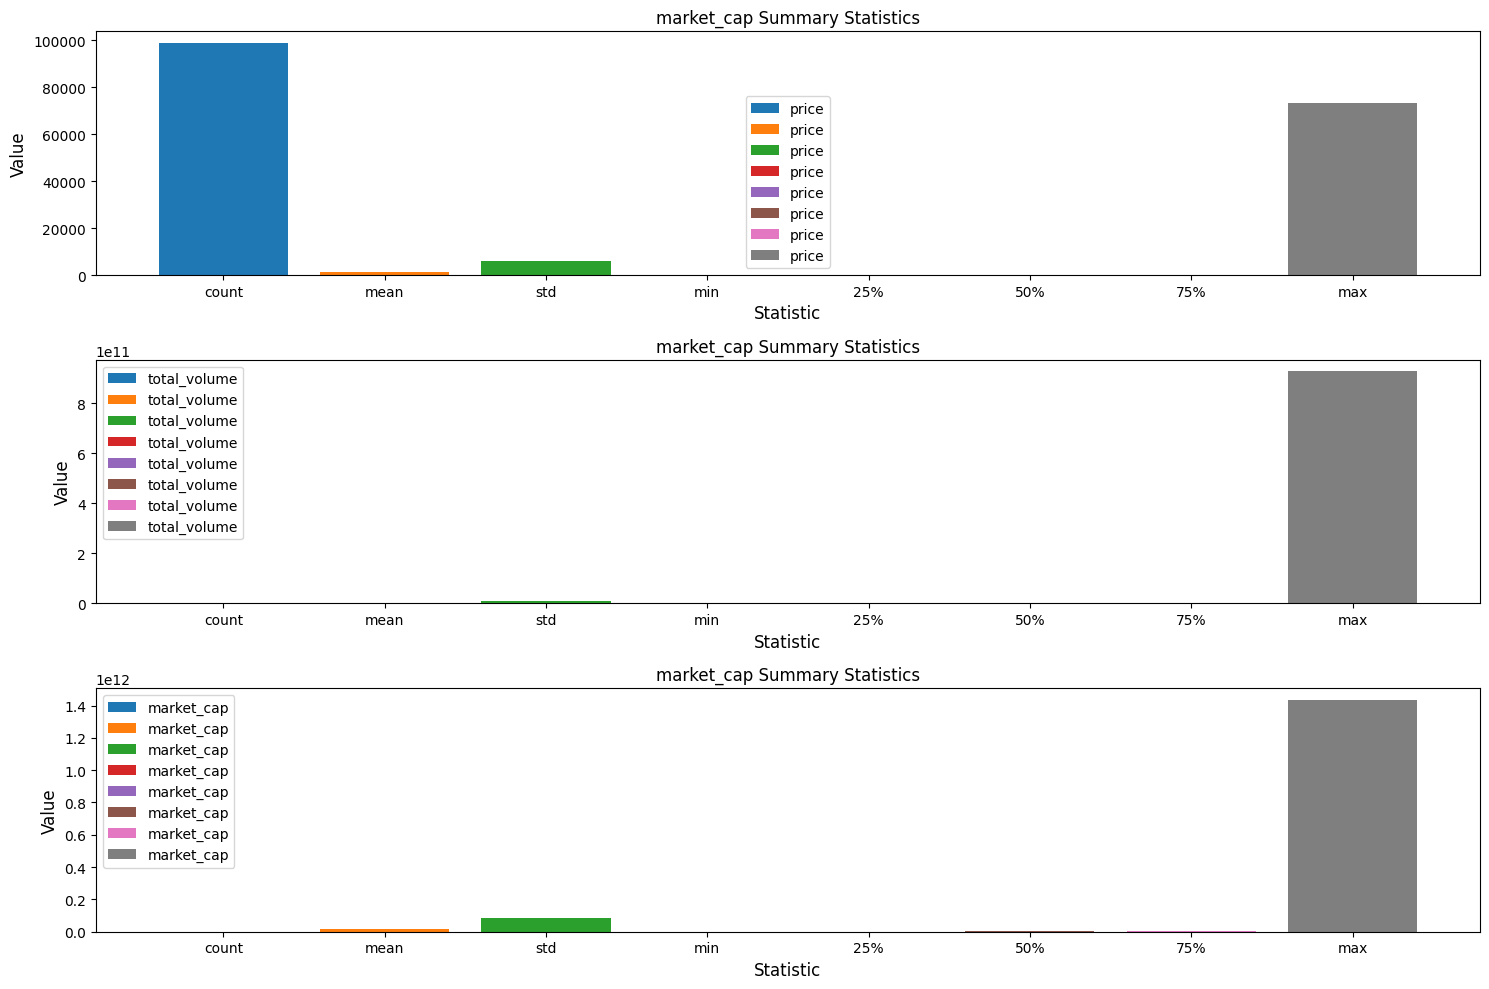

In [161]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (one for each statistic)
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot each statistic on a separate subplot
for i, column in enumerate(['price', 'total_volume', 'market_cap']):
    for stat, value in merged_df[column].describe().items():
        axes[i].bar(stat, value, label=column)

# Add titles, labels, and font properties
for ax in axes:
    ax.set_title(f'{column} Summary Statistics')
    ax.set_xlabel('Statistic', fontdict={'family': 'Arial', 'size': 12})
    ax.set_ylabel(f'Value', fontdict={'family': 'Arial', 'size': 12})
    ax.legend()

# Show the bar charts
plt.tight_layout()
plt.show()


In [174]:
merged_df.set_index('index', inplace=True)


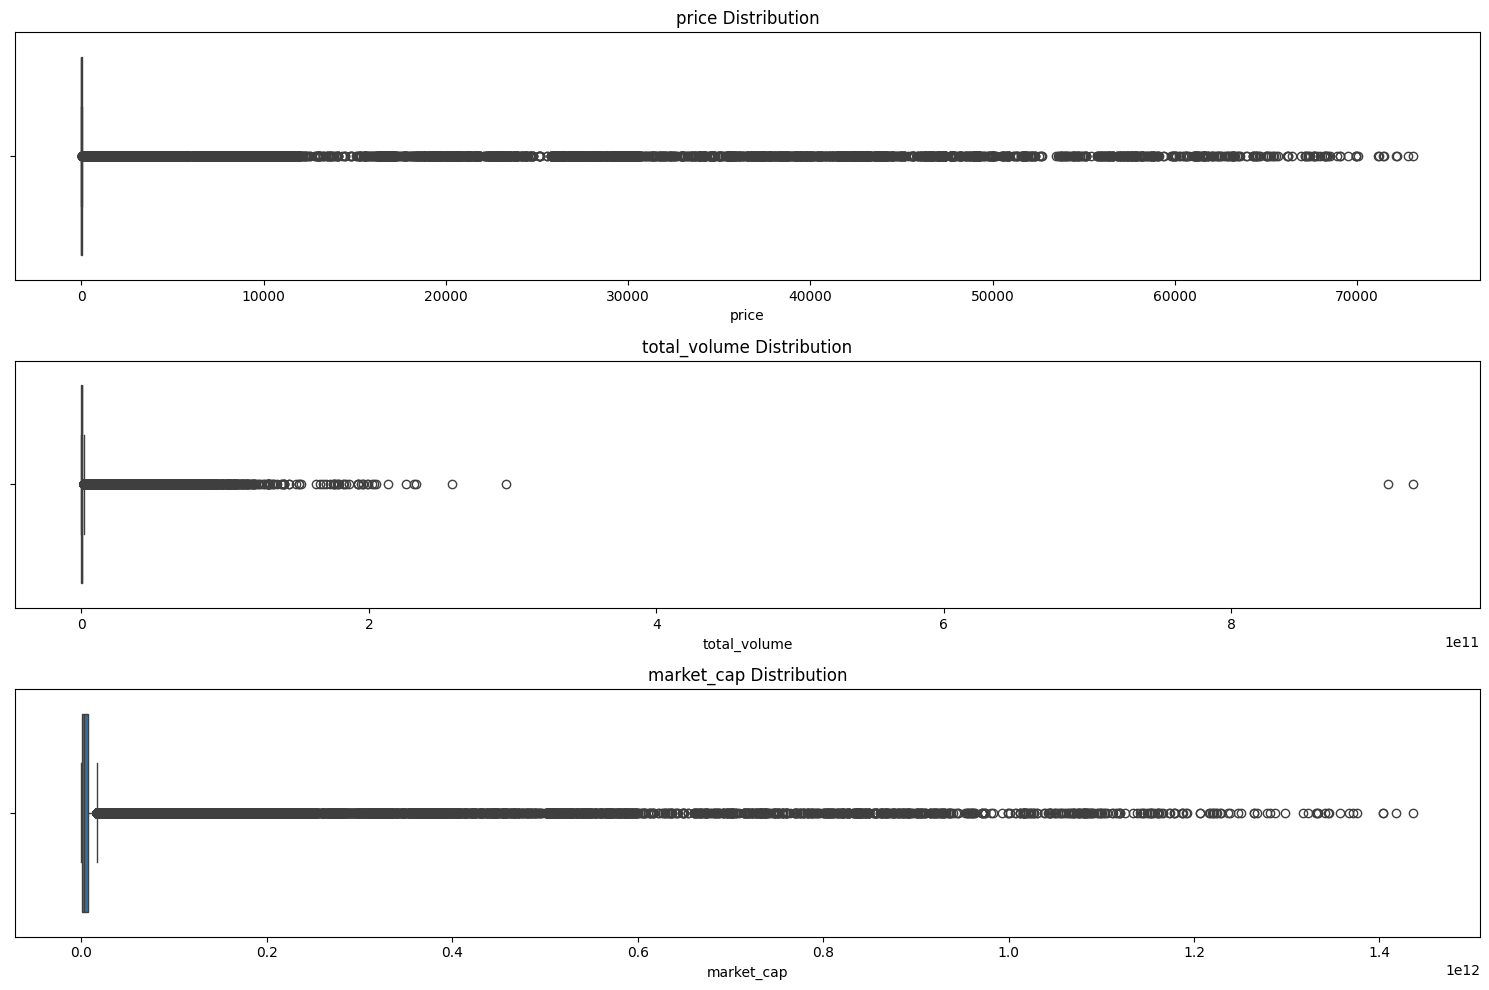

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default matplotlib style
plt.style.use('default')

# Create a boxplot for each column
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for i, column in enumerate(['price', 'total_volume', 'market_cap']):
    sns.boxplot(data=merged_df, x=column, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')

# Show the boxplots
plt.tight_layout()
plt.show()


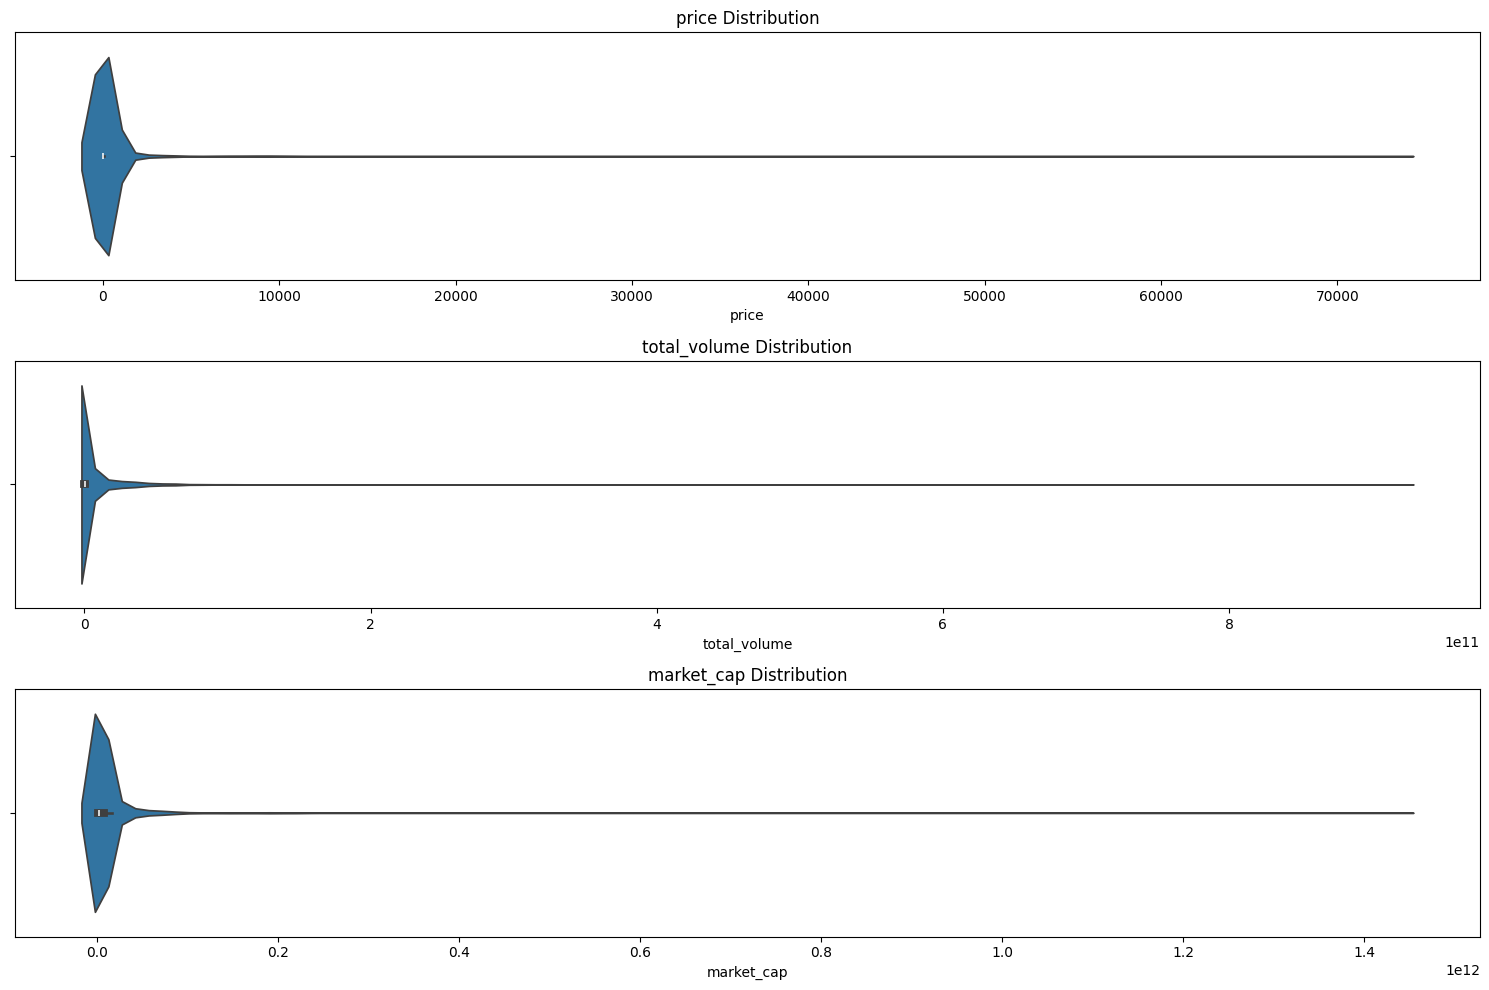

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set default matplotlib style
plt.style.use('default')

# Create a violin plot for each column
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
for i, column in enumerate(['price', 'total_volume', 'market_cap']):
    sns.violinplot(data=merged_df, x=column, ax=axes[i])
    axes[i].set_title(f'{column} Distribution')

# Show the violin plots
plt.tight_layout()
plt.show()


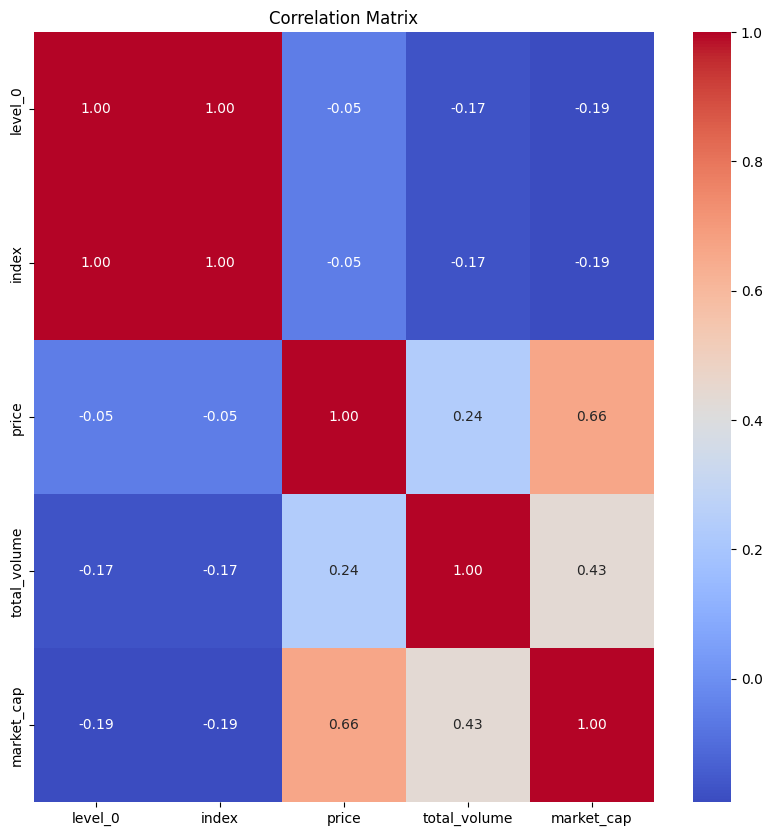

In [166]:
import seaborn as sns
import pandas as pd

# Identify numeric columns
numeric_columns = merged_df.select_dtypes(include=[np.number]).columns

# Create a correlation matrix using only numeric columns
correlation_matrix = merged_df[numeric_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Target Encoding**

In [183]:
from category_encoders.target_encoder import TargetEncoder


In [185]:
print(df.columns)


Index(['date', 'price', 'total_volume', 'market_cap', 'coin_name'], dtype='object')


In [186]:
columns = ['coin_name']


In [187]:
columns = ['coin_name']
for col in columns:
    encoder = TargetEncoder()
    df[col] = encoder.fit_transform(X=df[[col]], y=df['price'])


In [190]:
df['date'] = pd.to_datetime(df['date']).astype(int) // 10 ** 9


In [191]:
df.head()

,date,price,total_volume,market_cap,coin_name
0,1600732800,5.284244,2.458573e+08,1.243579e+08,31.168648
1,1600819200,5.284244,2.458573e+08,1.243579e+08,31.168648
2,1600905600,3.491229,9.734243e+07,8.633525e+07,31.168648
3,1600992000,4.573891,6.966517e+07,1.122094e+08,31.168648
4,1601078400,4.702974,4.195075e+07,1.154319e+08,31.168648


In [192]:
df.tail()

,date,price,total_volume,market_cap,coin_name
1278,1711152000,53.074283,1.389533e+09,2.000047e+10,31.168648
1279,1711238400,53.558370,7.476091e+08,2.021925e+10,31.168648
1280,1711324800,55.637222,6.014348e+08,2.100957e+10,31.168648
1281,1711411200,57.628380,1.115855e+09,2.168730e+10,31.168648
1282,1711497600,55.905605,9.427673e+08,2.107724e+10,31.168648


# **Building a Model**

In [230]:
# Display the class label distribution
print(df['price'].value_counts())

price
5.284244      2
14.981794     1
21.119060     1
20.560932     1
21.428867     1
             ..
134.469747    1
130.169607    1
126.069631    1
111.369659    1
55.905605     1
Name: count, Length: 1282, dtype: int64


In [231]:
# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))

In [235]:
scaled_data = scaler.fit_transform(df['price'].values.reshape(-1,1))

# **Train Test Split**

In [265]:
# Define window size for LSTM model
window_size = 120

In [266]:
# Split the data into training and testing sets
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [267]:
# Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [268]:
X_test = df[num_cols]
X_test = X_test.fillna(0)
X_test = scaler.transform(X_test)

In [272]:
# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
# Create sequences of data for LSTM model
X, y = [], []
for i in range(window_size, len(df)):
    X.append(scaled_data[i-window_size:i, :])
    y.append(scaled_data[i, 0])
    # Create sequences of data for LSTM model
X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

In [275]:
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [276]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [277]:
X_train.shape

(1026, 1, 120, 1)

In [ ]:
X_test


In [ ]:
y_test

In [286]:
# Define Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [287]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

In [289]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"MSE: {loss}")

5/5 [==============================] - 1s 4ms/step - loss: 4.1287e-04
MSE: 0.0004128708387725055


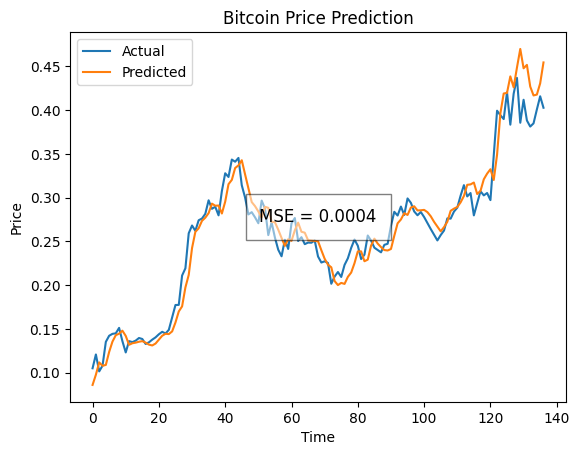

In [301]:
import matplotlib.pyplot as plt

# ... Your existing code for data preparation, model training, and predictions ...
# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Calculate MSE and format it to 4 decimal places
mse = float(mean_squared_error(y_test, predictions))
mse_formatted = "{:.4f}".format(mse)

# Add a text box with the MSE
plt.text(0.5, 0.5, f"MSE = {mse_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()



In [294]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.020319224321450797


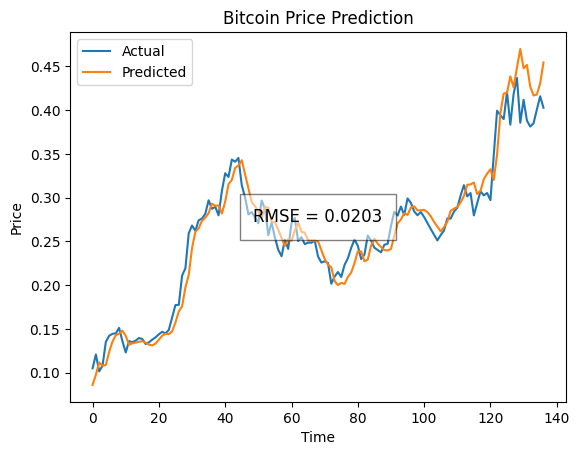

In [302]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate RMSE and format it to 4 decimal places
rmse = float(np.sqrt(mean_squared_error(y_test, predictions)))
rmse_formatted = "{:.4f}".format(rmse)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the RMSE
plt.text(0.5, 0.5, f"RMSE = {rmse_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [299]:
mae = np.mean(np.abs(y_test - predictions))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.01488534234759867


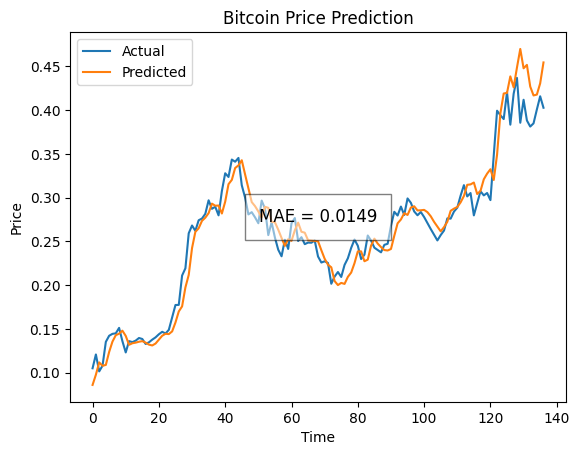

In [303]:
import matplotlib.pyplot as plt
import numpy as np

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate MAE and format it to 4 decimal places
mae = float(np.mean(np.abs(y_test - predictions)))
mae_formatted = "{:.4f}".format(mae)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the MAE
plt.text(0.5, 0.5, f"MAE = {mae_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [298]:

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = 100 * np.mean(np.abs((y_test - predictions) / y_test))
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 5.773338985326138


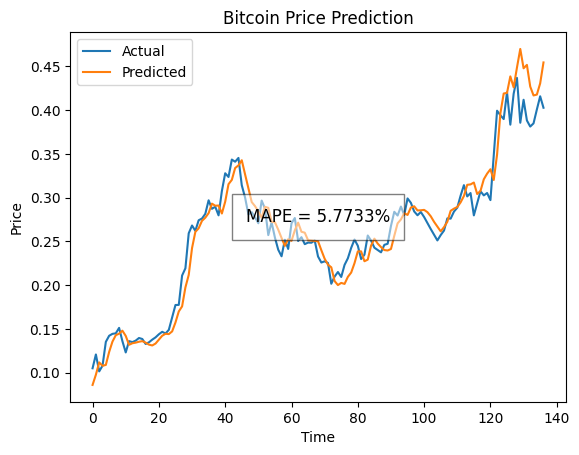

In [305]:
import matplotlib.pyplot as plt
import numpy as np

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate MAPE and format it to 4 decimal places
mape = float(np.mean(np.abs((y_test - predictions) / y_test))) * 100
mape_formatted = "{:.4f}".format(mape)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the MAPE
plt.text(0.5, 0.5, f"MAPE = {mape_formatted}%", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


In [296]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predictions)
print("R-squared (R2) score:", r2_score)

R-squared (R2) score: 0.930408097960966


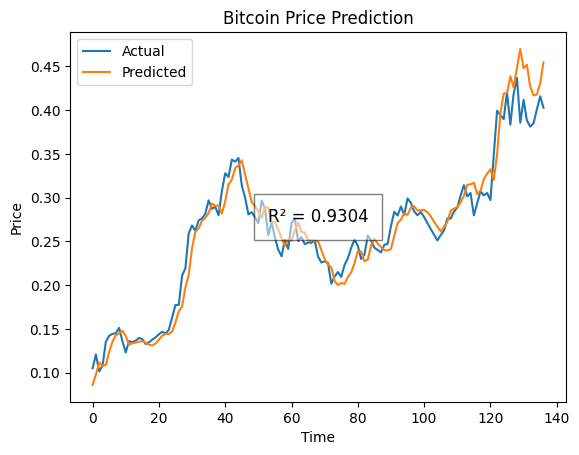

In [306]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# ... Your existing code for data preparation, model training, and predictions ...
# Calculate R² and format it to 4 decimal places
r2 = r2_score(y_test, predictions)
r2_formatted = "{:.4f}".format(r2)

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')

# Add a title and labels
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Add a text box with the R² score
plt.text(0.5, 0.5, f"R² = {r2_formatted}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

# Show the plot
plt.show()


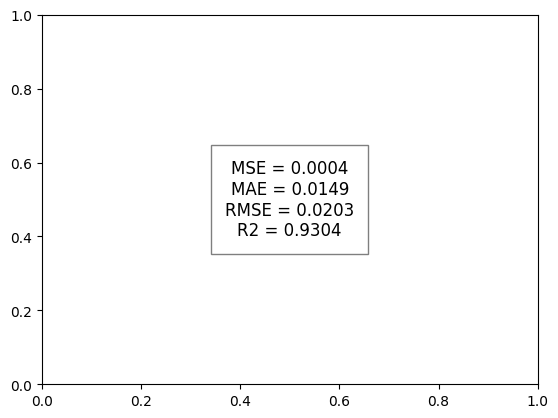

In [307]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... Your existing code ...
mse = float(mean_squared_error(y_test, predictions))
mae = float(mean_absolute_error(y_test, predictions))
rmse = float(np.sqrt(mean_squared_error(y_test, predictions)))
r2 = float(r2_score(y_test, predictions))

plt.text(0.5, 0.5, f"MSE = {mse:.4f}\nMAE = {mae:.4f}\nRMSE = {rmse:.4f}\nR2 = {r2:.4f}",
         transform=plt.gca().transAxes, ha='center', va='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()
